In [1]:
import sqlalchemy
import pymysql
from sqlalchemy import create_engine
import pandas as pd

In [2]:
password = '*'
db_name = 'launch_example'

In [3]:
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password=password, database=db_name)

In [4]:
connection = create_engine("mysql+pymysql://root:" + password + "@localhost:3306/" + db_name)

In [5]:
df1 = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTab1e.csv')
df1

,member_ID,member_fname,member_lname,exec_id,faction_id,favrep_id,year_joined,semester_hours
0,1,Alejandro,Capecchi,6,4,3,2019,20
1,2,Alex,Chung,6,2,10,2020,4
2,3,Bejoy,Sen,6,4,9,2021,2
3,4,Ethan,Steere,6,3,10,2020,1
4,5,Franky,Padilla Coo,6,3,4,2019,15
5,6,Himayatullah,Azizi,6,2,4,2021,17
6,7,Jake,Antmann,1,1,10,2020,14
7,8,Jayanth,Peetla,6,2,2,2020,13
8,9,Ji,Chen,6,2,3,2019,22
9,10,John,Le,6,3,7,2020,3


In [6]:
df2 = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTableDos.csv')
df2

,exec_id,position,elected
0,1,president,Spring
1,2,secretary,Fall
2,3,treasurer,Spring
3,4,vice president,Summer
4,5,outreach head,Fall
5,6,member,Fall


In [7]:
df3 = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTableTres.csv')
df3

,faction_id,species,mascot_name,Color
0,1,T-Rex,Ted,green
1,2,Dragon,Daisy,blue
2,3,Basilisk,Brittney,red
3,4,Frog,Kermit,yellow


In [8]:
df4 = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - Sn4ke.csv')
df4

,favrep_id,reptile,lifespan_years,diet,conservation_status
0,1,komodo dragon,30,carnivore,endangered
1,2,american alligator,40,carnivore,least concern
2,3,leatherback sea turtle,50,gelatinivore,vulnerable
3,4,tokay gecko,15,omnivore,endangered
4,5,bearded dragon,10,omnivore,least concern
5,6,gopher tortoise,90,herbivore,vulnerable
6,7,chameleon,6,omnivore,threatened
7,8,iguana,14,herbivore,threatened
8,9,anaconda,10,carnivore,least concern
9,10,poison dart frog,12,omnivore,threatened


In [9]:
df1.to_sql(name='Club_Members', con=connection, if_exists='replace', index=False)

27

In [10]:
df2.to_sql(name='Executive_Positions', con=connection, if_exists='replace', index=False)

6

In [11]:
df3.to_sql(name='Factions', con=connection, if_exists='replace', index=False)

4

In [12]:
df4.to_sql(name='Favorite_Reptiles', con=connection, if_exists='replace', index=False)

10

In [52]:
query1 = "SELECT  COUNT(Factions.species) / 5 * 100, Factions.species FROM Club_Members INNER JOIN Factions ON Club_Members.faction_id = Factions.faction_id WHERE exec_id < 6 GROUP BY Factions.species;"

In [53]:
resultq1 = pd.read_sql(query1, con=connection)

In [54]:
resultq1

,COUNT(Factions.species) / 5 * 100,species
0,20.0,T-Rex
1,40.0,Frog
2,40.0,Dragon


In [16]:
query2 = "SELECT AVG(semester_hours) AS mean_member_hrs FROM Club_Members WHERE exec_id = 6;"

In [17]:
resultq2 = pd.read_sql(query2, con=connection)
resultq2

,mean_member_hrs
0,10.7727


In [18]:
query3 = "SELECT AVG(semester_hours) AS mean_exec_hrs FROM Club_Members WHERE exec_id < 6;"

In [19]:
resultq3 = pd.read_sql(query3, con=connection)
resultq3

,mean_exec_hrs
0,18.8


In [24]:
query4 = "SELECT AVG(semester_hours), conservation_status FROM Club_Members INNER JOIN Favorite_Reptiles ON Club_Members.favrep_id = Favorite_Reptiles.favrep_id GROUP BY Favorite_Reptiles.conservation_status ORDER BY AVG(semester_hours) ASC;"

In [25]:
resultq4 = pd.read_sql(query4, con=connection)
resultq4

,AVG(semester_hours),conservation_status
0,8.0000,threatened
1,11.3333,least concern
2,14.1667,endangered
3,17.6000,vulnerable


In [22]:
query5 = "SELECT member_fname, member_lname, Factions.species, Factions.mascot_name, Factions.Color FROM Club_Members INNER JOIN Factions ON Club_Members.faction_id = Factions.faction_id WHERE exec_id = 6;"

In [23]:
resultq5 = pd.read_sql(query5, con=connection)
resultq5

,member_fname,member_lname,species,mascot_name,Color
0,Joon,Park,T-Rex,Ted,green
1,Mihir,Savkar,T-Rex,Ted,green
2,Miles,Lane,T-Rex,Ted,green
3,Olivia,Mostow,T-Rex,Ted,green
4,Sarrah,Abdulali,T-Rex,Ted,green
5,Tassneam,Osman,T-Rex,Ted,green
6,Alex,Chung,Dragon,Daisy,blue
7,Himayatullah,Azizi,Dragon,Daisy,blue
8,Jayanth,Peetla,Dragon,Daisy,blue
9,Ji,Chen,Dragon,Daisy,blue


In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

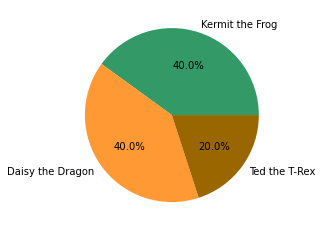

In [68]:
y = np.array([40.0, 40.0, 20.0])
mylabels = ["Kermit the Frog", "Daisy the Dragon", "Ted the T-Rex"]
mycolors = ["#339966", "#ff9933", "#996600"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct = '%.1f%%')
plt.savefig('factionpie.png', dpi = 200)
plt.show

findfont: Font family ['Deja Vu Sans'] not found. Falling back to DejaVu Sans.


<bound method Figure.show of <Figure size 864x360 with 1 Axes>>

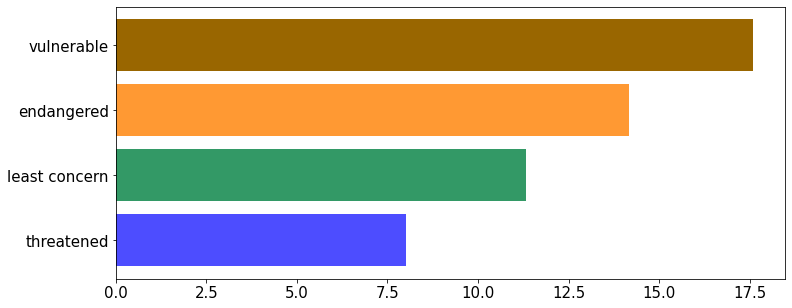

In [121]:
plt.rcParams.update({'font.size':15, 'font.family': 'Deja Vu Sans'})
y = np.array([8.0, 11.3333, 14.1667, 17.6])
x = np.array(["threatened", "least concern", "endangered", "vulnerable"])
mycolors = ["#4d4dff", "#339966", "#ff9933", "#996600"]
fig, axs = plt.subplots(figsize=(12,5))
axs.barh(x,y, color = mycolors,)
fig.savefig('conservationbar.png', dpi = 120)
fig.show

In [109]:
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
   print(f.name)
for f in fm.fontManager.afmlist:
   print(f.name)

STIXGeneral
STIXNonUnicode
STIXSizeOneSym
STIXSizeTwoSym
STIXSizeOneSym
cmtt10
STIXSizeFourSym
DejaVu Sans Mono
cmr10
STIXSizeFiveSym
cmsy10
DejaVu Sans Mono
DejaVu Sans
DejaVu Sans Mono
STIXNonUnicode
DejaVu Sans Display
STIXNonUnicode
DejaVu Sans
DejaVu Serif
cmmi10
DejaVu Sans
DejaVu Serif Display
cmb10
STIXGeneral
DejaVu Serif
STIXNonUnicode
DejaVu Serif
STIXGeneral
cmss10
STIXSizeTwoSym
STIXSizeFourSym
cmex10
STIXSizeThreeSym
STIXSizeThreeSym
STIXGeneral
DejaVu Sans Mono
DejaVu Serif
DejaVu Sans
Webdings
Noto Sans Kayah Li
Noto Sans Gothic
KufiStandardGK
Iowan Old Style
Farah
Apple SD Gothic Neo
Noto Sans Cypriot
Galvji
STIXIntegralsSm
Didot
Noto Sans Limbu
Noto Sans Inscriptional Parthian
STIXIntegralsD
Noto Sans Rejang
Bodoni 72 Smallcaps
Damascus
Al Nile
Noto Sans Saurashtra
Brush Script MT
Arial Narrow
STIXGeneral
Arial Narrow
Sinhala Sangam MN
STIXNonUnicode
System Font
Gurmukhi MT
Waseem
Hiragino Sans
Herculanum
Kohinoor Devanagari
DIN Alternate
Gujarati Sangam MN
Lucida Gra